In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')

from urllib.request import urlopen
from imageio import imread
import requests
import io

import cv2 
import os


import warnings
warnings.filterwarnings('ignore')

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

gpus = tf.config.experimental.list_physical_devices('GPU')
# print(gpus)

tf.config.experimental.set_memory_growth(gpus[0] , True)

from time import time


## Farsi Hand-written digits classification

In [2]:
# url = 'https://raw.githubusercontent.com/sraeisi/MachineLearning_Physics/master/Assignments/A3/X.npz'
# s=requests.get(url, stream=True).content
# X = np.load(io.BytesIO(s) )['arr_0']
# url = 'https://raw.githubusercontent.com/sraeisi/MachineLearning_Physics/master/Assignments/A3/Y.npz'
# s=requests.get(url, stream=True).content
# Y = np.load(io.BytesIO(s) )['arr_0']

X = np.load('X.npz')['arr_0']
Y = np.load('Y.npz')['arr_0']

from sklearn.utils import shuffle
X, Y = shuffle(X,Y, random_state = 0 )

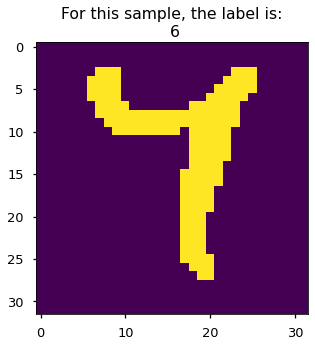

In [14]:
rand_ind = np.random.randint(0,len(Y) )

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1,1,1, title =f'For this sample, the label is:\n {Y[rand_ind]}' )
ax.imshow(X[rand_ind])
plt.show()

In [15]:
print('Each image is of the form: {}'.format(X[0].shape ) )

Each image is of the form: (32, 32)


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

In [4]:
n_w , n_h = X[0].shape

In [5]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Flatten(input_shape=(n_w , n_h) ))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               131200    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 132,490
Trainable params: 132,490
Non-trainable params: 0
_________________________________________________________________


In [6]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2, monitor="val_loss"),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5', 
                                       monitor='val_acc',
                                       mode='max',
                                       save_best_only=True),
    tf.keras.callbacks.TensorBoard(log_dir=f'logs_{model.name}', update_freq=100),
]

In [8]:
history = model.fit(X_train,Y_train, 
                    epochs=20, batch_size = 512, 
                    validation_data = (X_test, Y_test), 
                    callbacks=my_callbacks)

Train on 76764 samples, validate on 25588 samples
Epoch 1/20
76764/76764 [==============================] - 3s 43us/sample - loss: 0.3192 - accuracy: 0.9121 - val_loss: 0.1560 - val_accuracy: 0.9563
Epoch 2/20
76764/76764 [==============================] - 2s 23us/sample - loss: 0.1212 - accuracy: 0.9671 - val_loss: 0.1137 - val_accuracy: 0.9698
Epoch 3/20
76764/76764 [==============================] - 2s 23us/sample - loss: 0.0860 - accuracy: 0.9770 - val_loss: 0.0921 - val_accuracy: 0.9740
Epoch 4/20
76764/76764 [==============================] - 2s 26us/sample - loss: 0.0652 - accuracy: 0.9824 - val_loss: 0.0793 - val_accuracy: 0.9770
Epoch 5/20
76764/76764 [==============================] - 2s 26us/sample - loss: 0.0519 - accuracy: 0.9861 - val_loss: 0.0694 - val_accuracy: 0.9798
Epoch 6/20
76764/76764 [==============================] - 2s 26us/sample - loss: 0.0415 - accuracy: 0.9890 - val_loss: 0.0649 - val_accuracy: 0.9807
Epoch 7/20
76764/76764 [==============================] 

In [9]:
Y_predicted = np.argmax( model.predict(X_test) , axis=1 )
cm = confusion_matrix(Y_test, Y_predicted)
print(cm)

[[2517    0    2    0    1   16    0    0    0    0]
 [   1 2503    4    0    1    0    1    0    0    1]
 [   3    9 2443   21    9    0    6    5    0    4]
 [   2    0   56 2450   35    1    0    0    0    0]
 [   6    3   14   22 2624   12    8    3    0    0]
 [   7    1    1    1    3 2479    1    0    3    1]
 [   1    4    1    0    7    1 2571    4    2   17]
 [   2    3    1    1    4    3    7 2587    0    0]
 [   2    4    0    1    1    2    1    1 2525   11]
 [   0   11    0    0    2    0   16    0    4 2511]]


In [11]:
!tensorboard --logdir=f'logs_{model.name}'

## Convnet

In [0]:
X_train[0].shape

(32, 32)

In [21]:
n_w , n_h = X[0].shape
# from keras import layers
# from keras import models

model = models.Sequential()

model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(n_w , n_h, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 16)        160       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 2, 2, 64)          18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 64)               

In [15]:
## Data needs to be reshaped for the convolution layers. 
X_train = X_train.reshape(-1, n_w, n_h, 1)
X_test = X_test.reshape(-1, n_w, n_h, 1)

In [22]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2, monitor="val_loss"),
    tf.keras.callbacks.ModelCheckpoint(filepath='model_cnn.{epoch:02d}-{val_loss:.2f}.h5', 
                                       monitor='val_acc',
                                       mode='max',
                                       save_best_only=True),
    tf.keras.callbacks.TensorBoard(log_dir=f'logs_cnn_{model.name}', 
                                   histogram_freq=1,  
#                                    write_images=True, 
#                                    write_graph=True,
                                   update_freq=100 )
]

In [23]:
history = model.fit(X_train,Y_train, 
                    epochs=20, batch_size = 256, 
                    callbacks=my_callbacks,                    
                    validation_data = (X_test, Y_test) )

Train on 76764 samples, validate on 25588 samples
Epoch 1/20
76764/76764 [==============================] - 7s 91us/sample - loss: 0.3701 - accuracy: 0.8971 - val_loss: 0.0758 - val_accuracy: 0.9769
Epoch 2/20
76764/76764 [==============================] - 5s 68us/sample - loss: 0.0564 - accuracy: 0.9821 - val_loss: 0.0400 - val_accuracy: 0.9874
Epoch 3/20
76764/76764 [==============================] - 5s 70us/sample - loss: 0.0374 - accuracy: 0.9881 - val_loss: 0.0377 - val_accuracy: 0.9883
Epoch 4/20
76764/76764 [==============================] - 5s 60us/sample - loss: 0.0299 - accuracy: 0.9907 - val_loss: 0.0299 - val_accuracy: 0.9901
Epoch 5/20
76764/76764 [==============================] - 5s 62us/sample - loss: 0.0248 - accuracy: 0.9924 - val_loss: 0.0248 - val_accuracy: 0.9919
Epoch 6/20
76764/76764 [==============================] - 6s 72us/sample - loss: 0.0227 - accuracy: 0.9928 - val_loss: 0.0283 - val_accuracy: 0.9904
Epoch 7/20
76764/76764 [==============================] 

In [0]:
Y_predicted = np.argmax( model.predict(X_test ), axis=1 )
cm = confusion_matrix(Y_test, Y_predicted)
print(cm)

[[2532    0    0    0    0    3    0    0    0    1]
 [   3 2502    3    0    0    0    0    0    1    2]
 [   2    0 2489    9    0    0    0    0    0    0]
 [   0    0   25 2512    5    0    2    0    0    0]
 [   0    0    8   21 2657    0    6    0    0    0]
 [   6    2    0    0    2 2470    4    0    5    8]
 [   0    0    5    0    5    2 2586    0    0   10]
 [   3    2    8    0    1    0    0 2594    0    0]
 [   0    2    0    0    1    1    0    0 2544    0]
 [   0    3    0    0    0    0    5    0    0 2536]]


# Galaxy Zoo

The data here is take from the Galaxy Zoo II survey. For detailed information, see

https://arxiv.org/pdf/1308.3496.pdf

The labels are more involved. Here I simplified the classification problem in the sense that the labels here are only the answers to the first question in the survey, i.e. Is the galaxy simply smooth, and rounded, with no sign of a disk? 

answers: 

1. smooth, 

2. features or disk, 

3. star or artifact).

In [62]:
import io, requests, zipfile
import pandas as pd

# url_x = "https://www.dropbox.com/s/optw30o55q6mxlw/Cropped%26resized_GS_100_10000_withlabels.npz?dl=1"
# url_y = 'https://www.dropbox.com/s/ctjjap42qilhu9s/Y_1.csv?dl=1'

### This file contains classes and the ids. 
# s=requests.get(url_y, stream=True).content
# df = pd.read_csv(io.BytesIO(s), index_col=0) 

# ### This file contains images and the ids. 
# s=requests.get(url_x, stream=True).content
# # d = np.load(io.BytesIO(s))

path = 'C:\\Users\\sraeisi\\Documents\\Datasets\\Physics\\Galaxies\\Kaggle\\'

d = np.load(path+'Cropped&resized_GS_100_10000_withlabels.npz')
df = pd.read_csv(path+'Y_1.csv', index_col=0) 

X, ids = [d[f] for f in ['imgs','ids']]
ids = ids.astype('float')

### We can make the labels based on the ids in the X file.
Y = df.loc[ids].values
print(Y.shape)

(10000, 3)


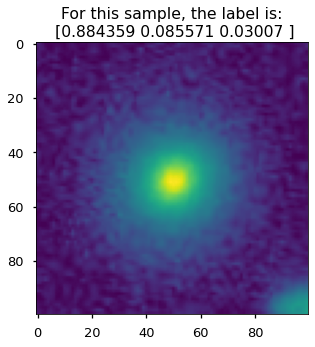

In [63]:
rand_ind = np.random.randint(0,len(Y) )

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1,1,1, title =f'For this sample, the label is:\n {Y[rand_ind]}' )
ax.imshow(X[rand_ind])
plt.show()

In [0]:
'''Implement LeNet-5'''